# Kolorowanie grafu planarnego

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.coloring import greedy_color

# Definicje

Mówimy, że graf jest **planarny**, jeżeli można przedstawić go na płaszczyźnie w taki sposób, że:
- wierzchołki grafu są reprezentowane przez punkty na płaszczyźnie,
- krawędzie grafu są reprezentowane przez krzywe łączące wierzchołki,
- krawędzie grafu nie przecinają się, z wyjątkiem wierzchołków grafu.

Taką reprezentację grafu planarnego nazywamy **grafem płaskim**.
Przykład: $K_4$.

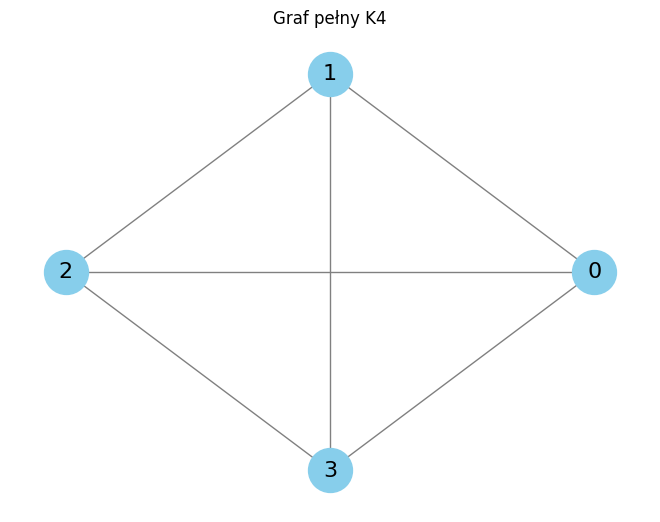

In [ ]:
# Tworzenie grafu pełnego K4
K4 = nx.complete_graph(4)

# Rysowanie grafu
pos = nx.circular_layout(K4)  # rozmieszczenie wierzchołków w okrąg
nx.draw(K4, pos, with_labels=True, node_color='skyblue', node_size=1000, font_size=16, edge_color='gray')
plt.title("Graf pełny K4")
plt.show()

Dwa minimalne grafy, które nie są planarne, to $K_5$ i $K_{3,3}$.

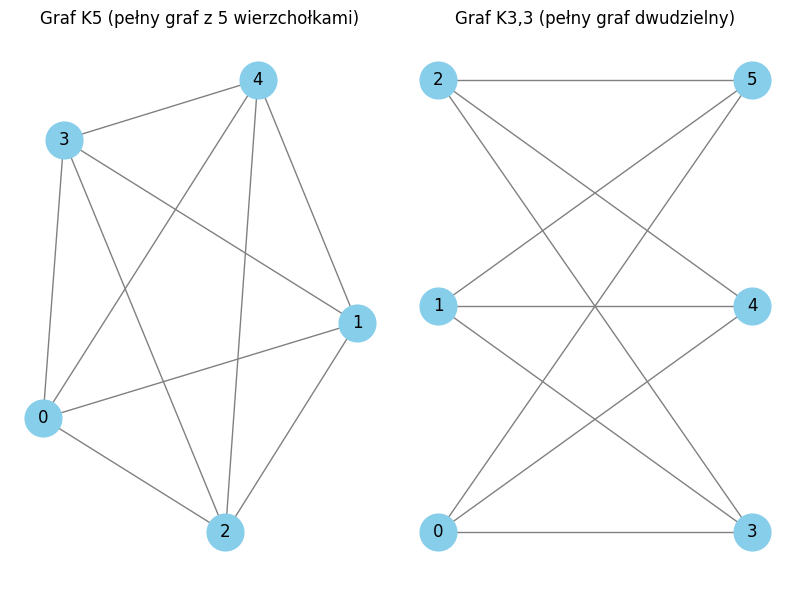

In [ ]:
# K5 - graf pełny z 5 wierzchołkami
K5 = nx.complete_graph(5)

# K3,3 - graf dwudzielny pełny
K33 = nx.complete_bipartite_graph(3, 3)

# Lista grafów i ich tytułów
graphs = [
    (K5, "Graf K5 (pełny graf z 5 wierzchołkami)"),
    (K33, "Graf K3,3 (pełny graf dwudzielny)")
]

# Rysowanie 3 grafów obok siebie
plt.figure(figsize=(12, 6))

for i, (G, title) in enumerate(graphs, 1):
    plt.subplot(1, 3, i)
    pos = nx.spring_layout(G) if not nx.is_bipartite(G) else nx.bipartite_layout(G, range(3))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=700)
    plt.title(title)

plt.tight_layout()
plt.show()

**Kolorowanie wierzchołków grafu** przypisywanie kolorów do wierzchołków w taki sposób, aby żadne dwa sąsiednie wierzchołki nie miały tego samego koloru. Celem jest minimalizacja liczby użytych kolorów.

<ipython-input-19-6c584fcf34fe>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Set3', max(colors) + 1)


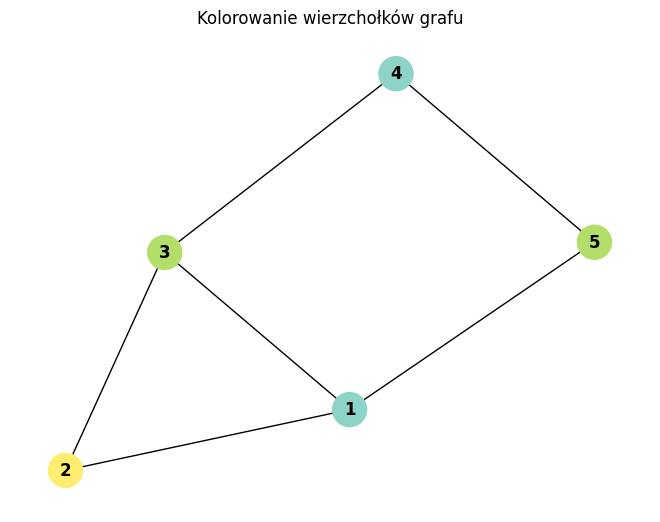

Kolory wierzchołków: {1: 0, 3: 1, 2: 2, 4: 0, 5: 1}


In [ ]:
# Tworzymy prosty graf
D = nx.Graph()
D.add_edges_from([
    (1, 2), (1, 3), (2, 3),  # trójkąt
    (3, 4), (4, 5), (5, 1)   # dodajemy dodatkowe połączenia
])

# Kolorujemy graf
coloring = nx.coloring.greedy_color(D, strategy='largest_first')

# Wyciągamy kolory do listy odpowiadającej wierzchołkom
colors = [coloring[node] for node in D.nodes()]

# Tworzymy paletę kolorów do wizualizacji
cmap = plt.cm.get_cmap('Set3', max(colors) + 1)

# Rysujemy graf
pos = nx.spring_layout(D)
nx.draw(D, pos, with_labels=True, node_color=colors, cmap=cmap, node_size=600, font_weight='bold')
plt.title("Kolorowanie wierzchołków grafu")
plt.show()

# Pokazujemy przypisane kolory
print("Kolory wierzchołków:", coloring)

**Liczba chromatyczna** grafu $G$ jest to najmniejsza liczba $k$ taka, że istnieje pokolorowanie $G$ za pomocą $k$ kolorów i jest oznaczana symbolem $χ(G)$.

In [ ]:
# Tworzymy graf
G = nx.Graph()
G.add_edges_from([
    (1, 2), (1, 3), (2, 3),  # trójkąt (potrzeba 3 kolorów)
    (3, 4), (4, 5)           # dodajemy ścieżkę
])

# Kolorujemy graf heurystycznie
coloring = nx.coloring.greedy_color(G, strategy='largest_first')

# Wyznaczamy liczbę chromatyczną
chromatic_number = max(coloring.values()) + 1

# Wyniki
print("Kolorowanie:", coloring)
print("Liczba chromatyczna:", chromatic_number)

Kolorowanie: {3: 0, 1: 1, 2: 2, 4: 1, 5: 0}
Liczba chromatyczna: 3


**Graf dwudzielny** to graf, w którym wierzchołki można podzielić na dwa rozłączne zbiory, tak że wszystkie krawędzie łączą wierzchołki z różnych zbiorów.

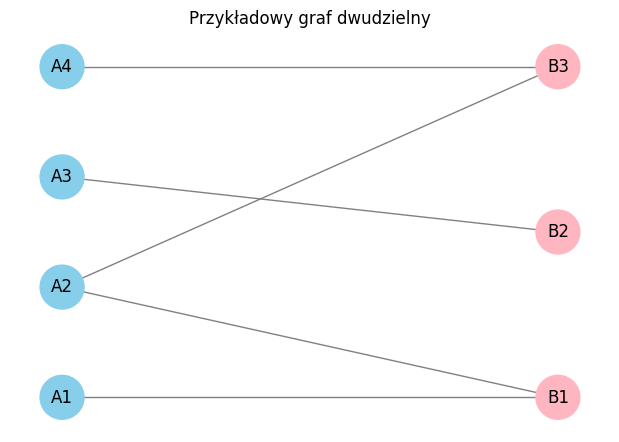

In [ ]:
# Grupy wierzchołków w grafie dwudzielnym
A = ["A1", "A2", "A3", "A4"]  # grupa 1
B = ["B1", "B2", "B3"]        # grupa 2

# Tworzenie pustego grafu
BipartiteGraph = nx.Graph()

# Dodanie wierzchołków z atrybutem 'bipartite'
BipartiteGraph.add_nodes_from(A, bipartite=0)
BipartiteGraph.add_nodes_from(B, bipartite=1)

# Dodanie przykładowych krawędzi między grupami
edges = [("A1", "B1"), ("A2", "B1"), ("A3", "B2"), ("A4", "B3"), ("A2", "B3")]
BipartiteGraph.add_edges_from(edges)

# Ustawienie pozycji w układzie dwudzielnym
pos = nx.bipartite_layout(BipartiteGraph, A)

# Rysowanie grafu
plt.figure(figsize=(6, 4))
nx.draw(
    BipartiteGraph,
    pos,
    with_labels=True,
    node_color=["skyblue" if node in A else "lightpink" for node in BipartiteGraph.nodes()],
    node_size=1000,
    edge_color='gray',
    font_size=12
)
plt.title("Przykładowy graf dwudzielny")
plt.show()

# Twierdzenia:

## 1. Twierdzenie Eulera dla grafów planarnych
*Dla dowolnego spójnego grafu planarnego, który jest narysowany na płaszczyźnie bez przecinających się krawędzi*
$𝑣 − 𝑒 + 𝑓 = 2$
*gdzie:*
* v — *liczba wierzchołków,*
* e — *liczba krawędzi,*
* f — *liczba ścian (obszarów, w tym zewnętrzny).*

To fundament dla rozważań nad własnościami grafów planarnych. Pozwala wyprowadzać inne ograniczenia, np. maksymalną liczbę krawędzi.

Liczba wierzchołków (w): 8
Liczba krawędzi (k): 12
Liczba ścian (f): 6
w - k + f = 2


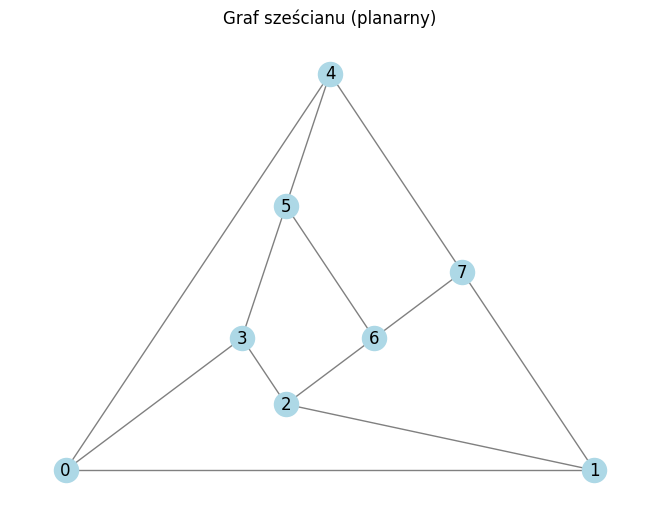

In [ ]:
# Tworzymy graf sześcianu (cube graph)
E = nx.cubical_graph()

# Liczba wierzchołków
w = E.number_of_nodes()

# Liczba krawędzi
k = E.number_of_edges()

# Liczba ścian – dla grafów planarnych można to uzyskać przez "embedding"
is_planar, embedding = nx.check_planarity(E)
if is_planar:
    # Calculate the number of faces using Euler's formula: v - e + f = 2
    # f = 2 - v + e
    liczba_s = 2 - w + k
else:
    liczba_s = None
    print("Graf nie jest planarny!")

# Sprawdzenie twierdzenia Eulera
print("Liczba wierzchołków (w):", w)
print("Liczba krawędzi (k):", k)
print("Liczba ścian (f):", liczba_s)
# Check Euler's formula only if the graph is planar
if is_planar:
    print("w - k + f =", w - k + liczba_s)

# Rysowanie grafu
pos = nx.planar_layout(E)
nx.draw(E, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Graf sześcianu (planarny)")
plt.show()

## 2. Twierdzenie o maksymalnej liczbie krawędzi
*Dla prostego grafu planarnego o $v≥3$ wierzchołkach:  $e≤3v−6$.*

To ograniczenie mówi, że graf planarny nie może być zbyt "gęsty" — nie może mieć za dużo krawędzi.

Uzasadnienie (intuicyjnie):
W grafie planarnym bez cykli długości 3, każda ściana ma przynajmniej 4 krawędzie, więc można wyprowadzić jeszcze silniejsze ograniczenia (np.
$e≤2v−4$).

Liczba wierzchołków (w): 4
Liczba krawędzi (k): 6
Maksymalna liczba krawędzi zgodnie z twierdzeniem: 6
Twierdzenie spełnione: True


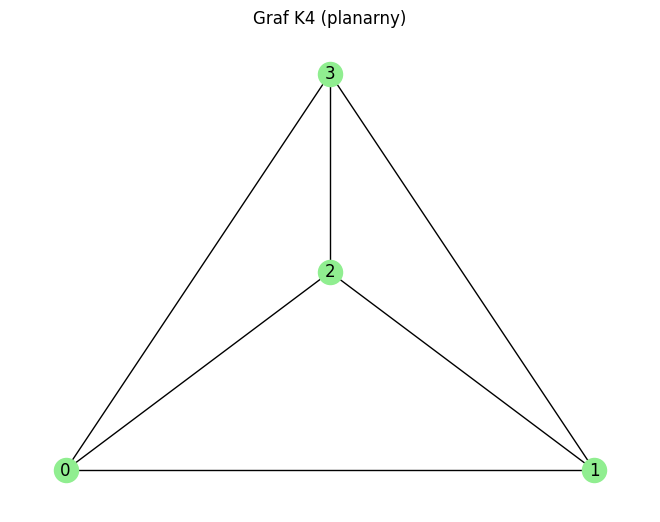

In [ ]:
# Tworzymy graf pełny K4
K = nx.complete_graph(4)

# Liczba wierzchołków i krawędzi
w = K.number_of_nodes()
k = K.number_of_edges()

# Maksymalna liczba krawędzi według twierdzenia
max_edges = 3 * w - 6

# Sprawdzenie twierdzenia
print("Liczba wierzchołków (w):", w)
print("Liczba krawędzi (k):", k)
print("Maksymalna liczba krawędzi zgodnie z twierdzeniem:", max_edges)
print("Twierdzenie spełnione:", k <= max_edges)

# Rysowanie grafu
pos = nx.planar_layout(K)
nx.draw(K, pos, with_labels=True, node_color='lightgreen', edge_color='black')
plt.title("Graf K4 (planarny)")
plt.show()

## 3. Twierdzenie Kuratowskiego
*Graf jest planarny wtedy i tylko wtedy, gdy nie zawiera podgrafu homeomorficznego do:*
- *$K_5$ (pełny graf na 5 wierzchołkach),*
- *$K_{3,3}$ (pełny graf dwudzielny z 3 wierzchołkami w każdej części).*

To kryterium planarności. Używane w algorytmach sprawdzających, czy dany graf jest planarny.

Podgraf homeomorficzny – może zawierać dodatkowe wierzchołki w środku krawędzi.

In [ ]:
C = nx.complete_graph(5)  # K₅ – nieplanarny
is_planar, embedding = nx.check_planarity(C)
print("Planarny:", is_planar)

Planarny: False


## 4. Twierdzenie o 5-kolorowalności (Heawood, 1890)
*Każdy graf planarny jest 5-kolorowalny.*

"$5$-kolorowalny$(v)$" oznacza, że wierzchołki grafu $v$ (czyli zbioru wierzchołków $V(G)$) można pokolorować co najwyżej 5 kolorami w taki sposób, że żadne dwa sąsiednie wierzchołki nie mają tego samego koloru.

Graf pokolorowano 4 kolorami (zgodnie z twierdzeniem Heawooda)


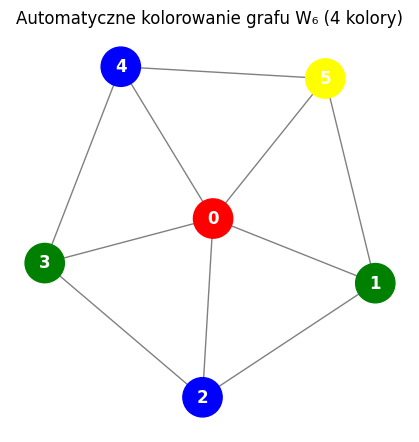

In [21]:
# Tworzymy graf planarny: wheel graph W6
A = nx.wheel_graph(6)

# Automatyczne kolorowanie z użyciem algorytmu greedy
coloring = nx.coloring.greedy_color(A, strategy='largest_first')

# Upewniamy się, że liczba kolorów nie przekracza 5
max_color = max(coloring.values()) + 1
if max_color > 5:
    print(f"Uwaga: użyto {max_color} kolorów – więcej niż 5!")
else:
    print(f"Graf pokolorowano {max_color} kolorami (zgodnie z twierdzeniem Heawooda)")

# Kolory dla wizualizacji
color_palette = ['red', 'green', 'blue', 'yellow', 'purple']
node_colors = [color_palette[coloring[node]] for node in A.nodes()]

# Pozycje wierzchołków
pos = nx.spring_layout(A, seed=42)

# Rysowanie grafu
plt.figure(figsize=(4, 4))
nx.draw(
    A,
    pos,
    with_labels=True,
    node_color=node_colors,
    edge_color='gray',
    node_size=800,
    font_color='white',
    font_weight='bold'
)
plt.title(f"Automatyczne kolorowanie grafu W₆ ({max_color} kolory)")
plt.axis('off')
plt.show()

## 5.Twierdzenie 4-kolorowe (Appel, Haken, 1976)
*Każdy graf planarny można poprawnie pokolorować przy użyciu co najwyżej 4 kolorów.*

Rozwiązuje wieloletni problem (ponad 100 lat!). To pierwszy przypadek, gdy komputer został użyty do istotnej części dowodu matematycznego.

Dowód opierał się na komputerowym sprawdzeniu ogromnej liczby przypadków (setki nieizomorficznych konfiguracji). Był kontrowersyjny, bo nie każdy mógł go zweryfikować ręcznie.

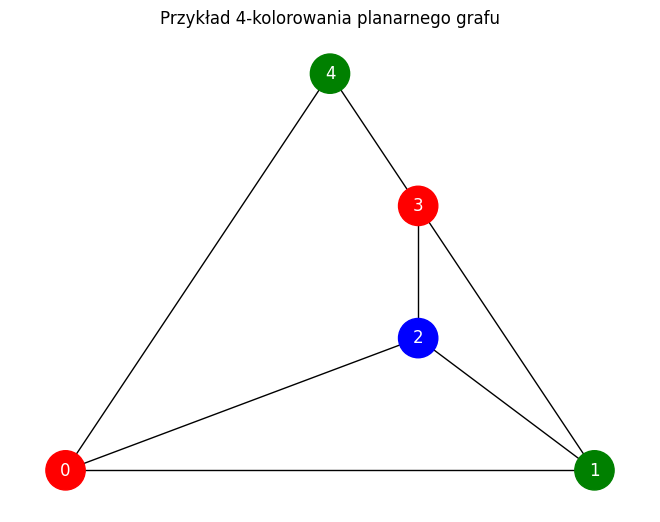

In [ ]:
# Tworzymy planarny graf (przykład: graf Koła z 5 wierzchołkami)
B = nx.Graph()

# Dodajemy wierzchołki i krawędzie
edges = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 0), (0, 2), (1, 3)]
B.add_edges_from(edges)

# Kolorowanie wierzchołków (algorytm zachłanny)
coloring = nx.coloring.greedy_color(B, strategy="largest_first")

# Ustalamy kolory (maksymalnie 4)
color_map = ['red', 'green', 'blue', 'yellow']
node_colors = [color_map[coloring[node]] for node in B.nodes()]

# Rysujemy graf
pos = nx.planar_layout(B)
nx.draw(B, pos, with_labels=True, node_color=node_colors, edge_color='black', node_size=800, font_color='white')
plt.title("Przykład 4-kolorowania planarnego grafu")
plt.show()

# Kolorowanie mapy

### Krok 1: Definicja grafu (sąsiedztwa województw w Polsce)

In [ ]:
graph_data = {
    'Zachodniopomorskie': ['Pomorskie', 'Wielkopolskie', 'Lubuskie'],
    'Pomorskie': ['Zachodniopomorskie', 'Kujawsko-Pomorskie', 'Warmińsko-Mazurskie'],
    'Warmińsko-Mazurskie': ['Pomorskie', 'Kujawsko-Pomorskie', 'Mazowieckie', 'Podlaskie'],
    'Lubuskie': ['Zachodniopomorskie', 'Wielkopolskie', 'Dolnośląskie'],
    'Wielkopolskie': ['Zachodniopomorskie', 'Lubuskie', 'Dolnośląskie', 'Opolskie', 'Łódzkie', 'Kujawsko-Pomorskie'],
    'Kujawsko-Pomorskie': ['Pomorskie', 'Warmińsko-Mazurskie', 'Wielkopolskie', 'Łódzkie', 'Mazowieckie'],
    'Dolnośląskie': ['Lubuskie', 'Wielkopolskie', 'Opolskie'],
    'Opolskie': ['Dolnośląskie', 'Wielkopolskie', 'Śląskie'],
    'Śląskie': ['Opolskie', 'Wielkopolskie', 'Łódzkie', 'Małopolskie', 'Świętokrzyskie'],
    'Łódzkie': ['Wielkopolskie', 'Kujawsko-Pomorskie', 'Mazowieckie', 'Świętokrzyskie', 'Śląskie'],
    'Mazowieckie': ['Warmińsko-Mazurskie', 'Kujawsko-Pomorskie', 'Łódzkie', 'Świętokrzyskie', 'Lubelskie', 'Podlaskie'],
    'Podlaskie': ['Warmińsko-Mazurskie', 'Mazowieckie', 'Lubelskie'],
    'Lubelskie': ['Podlaskie', 'Mazowieckie', 'Świętokrzyskie', 'Podkarpackie'],
    'Świętokrzyskie': ['Łódzkie', 'Mazowieckie', 'Lubelskie', 'Podkarpackie', 'Małopolskie', 'Śląskie'],
    'Małopolskie': ['Śląskie', 'Świętokrzyskie', 'Podkarpackie'],
    'Podkarpackie': ['Małopolskie', 'Świętokrzyskie', 'Lubelskie']
}

### Krok 2: Tworzenie obiektu grafu

In [ ]:
M = nx.Graph(graph_data)

### Krok 3: Algorytm kolorowania grafu (zachłanny)

In [ ]:
colors_map = nx.coloring.greedy_color(M, strategy='largest_first')

# Przygotowanie listy kolorów dla wizualizacji
node_colors = [colors_map[node] for node in M.nodes()]

# Utworzenie palety kolorów dla wizualizacji.
distinct_color_ids = sorted(list(set(node_colors)))
color_palette_names = [
    'red', 'blue', 'green', 'yellow', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan'
]
color_mapping = {}
for i, color_id in enumerate(distinct_color_ids):
    if i < len(color_palette_names):
        color_mapping[color_id] = color_palette_names[i]
    else:
        color_mapping[color_id] = plt.cm.viridis(i / len(distinct_color_ids))

mapped_colors = [color_mapping[colors_map[node]] for node in M.nodes()]

### Krok 4: Wizualizacja grafu

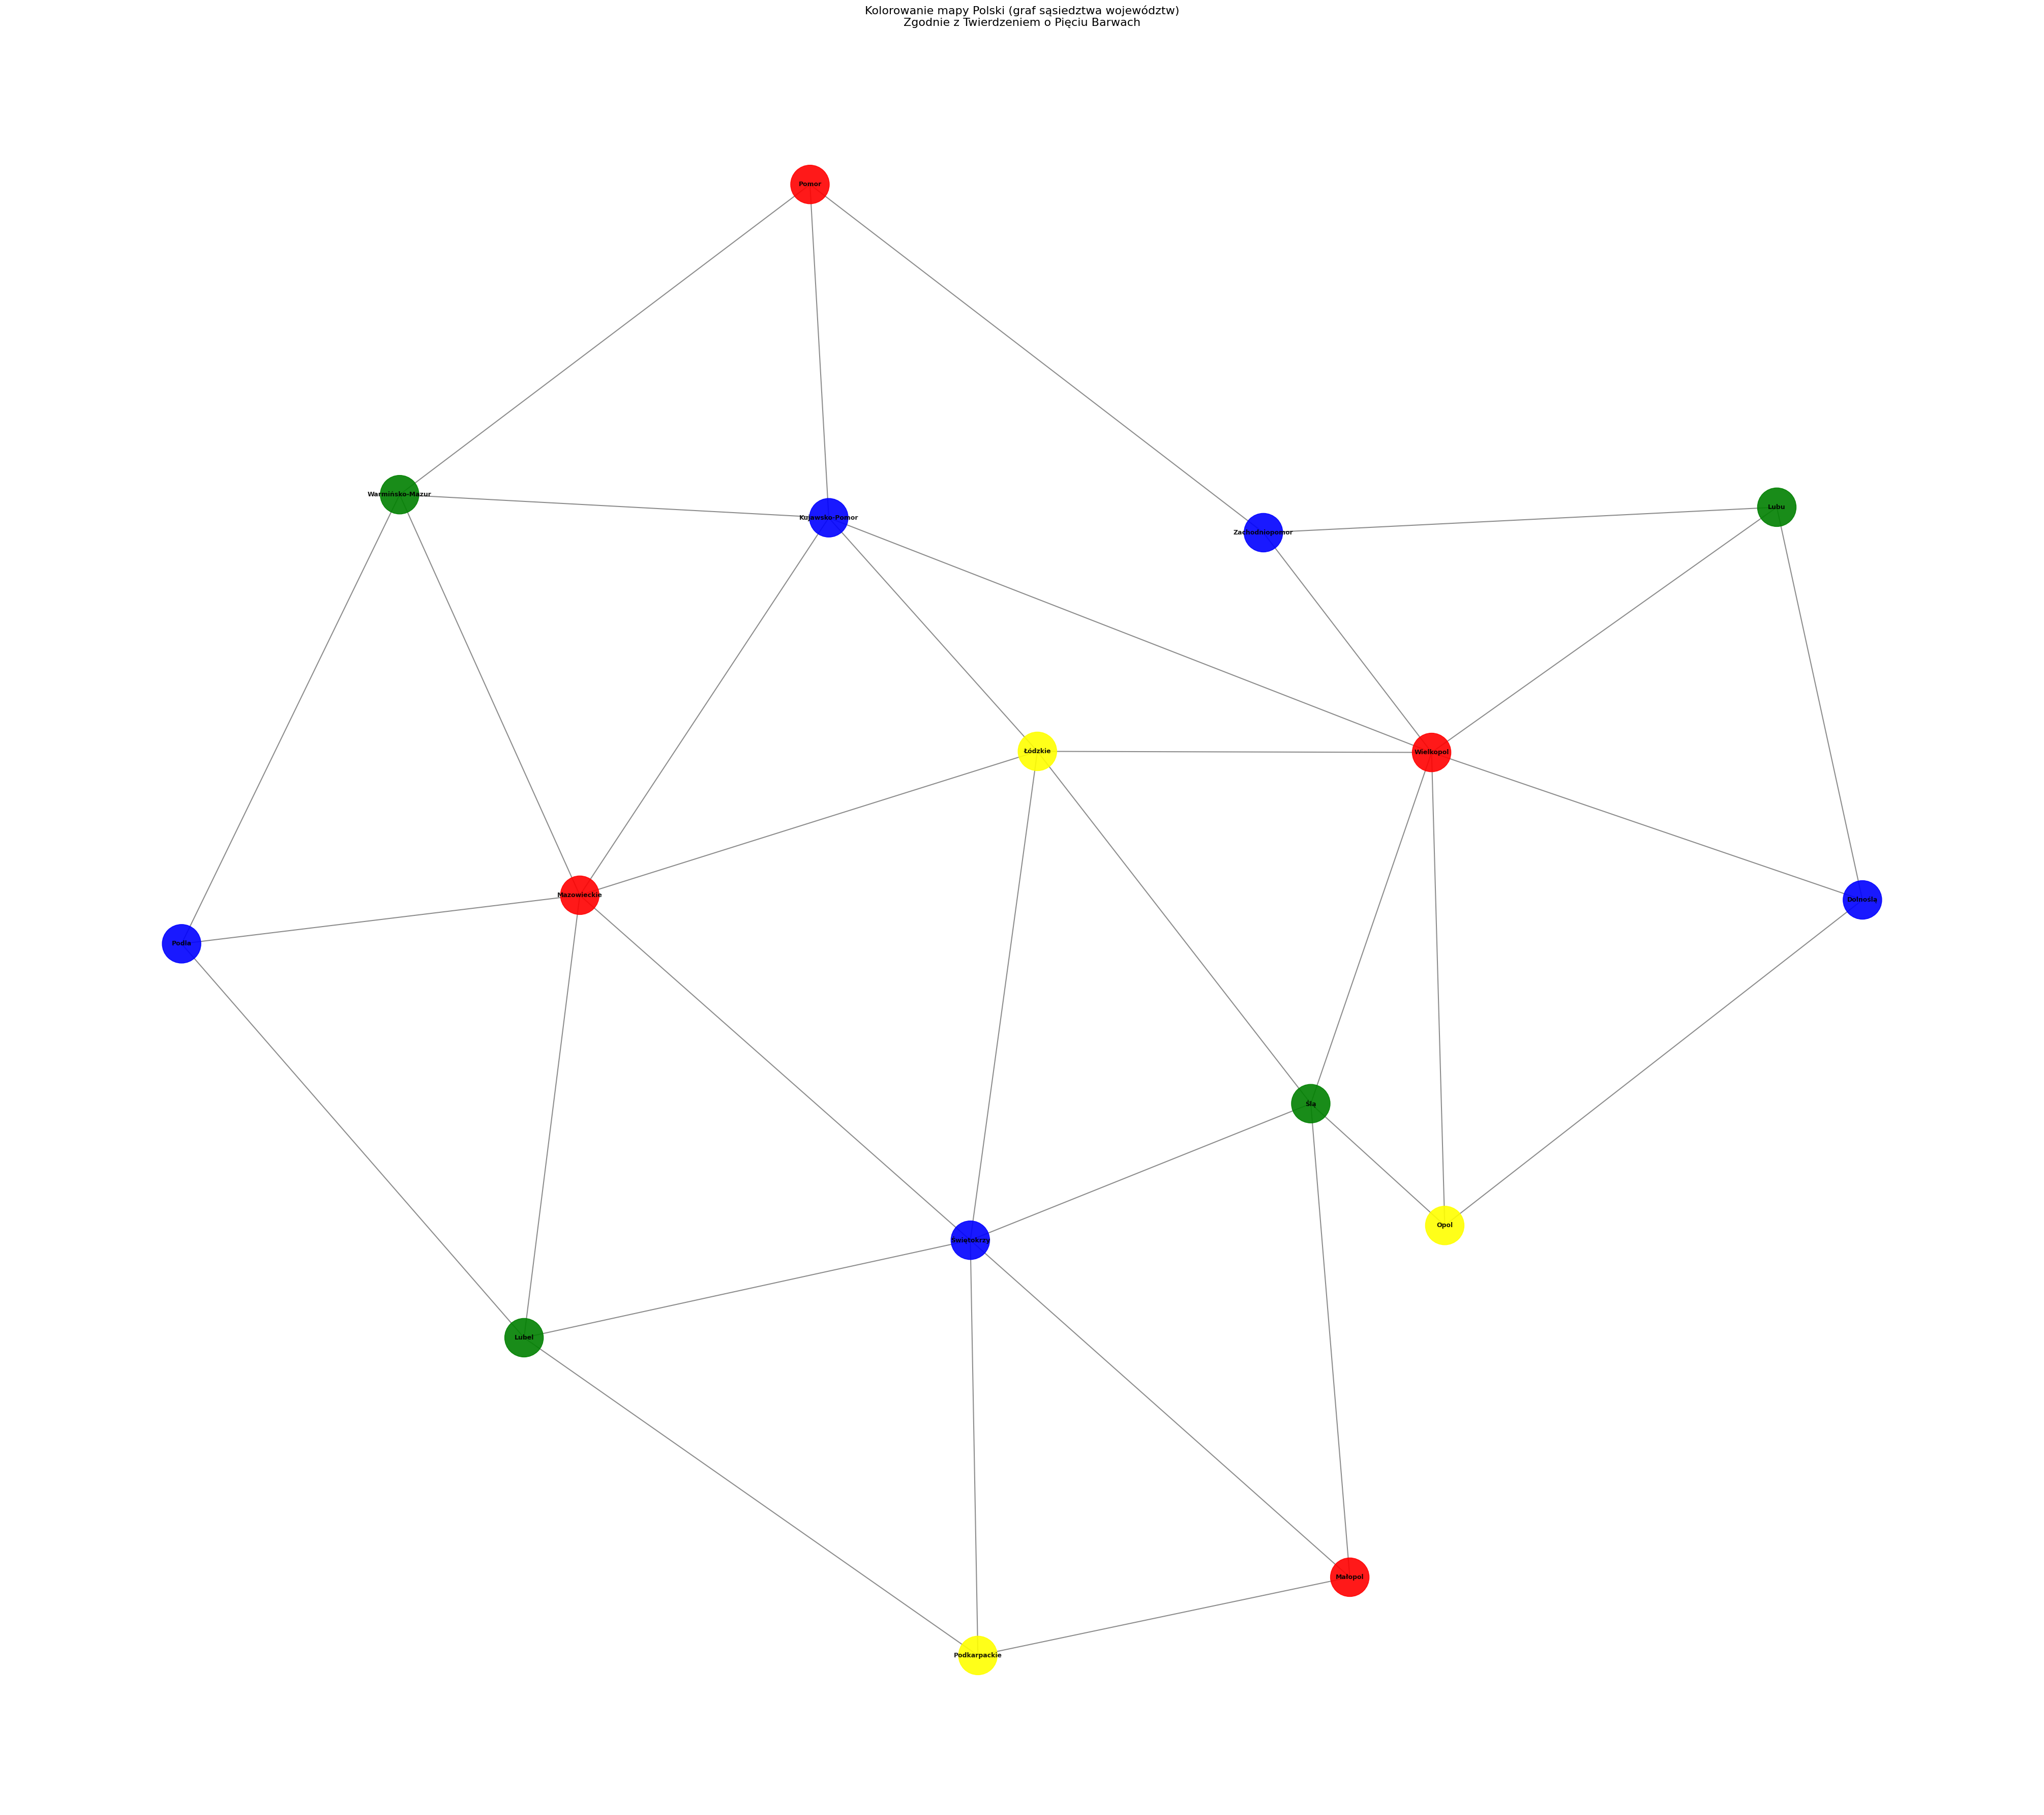


--- Wyniki kolorowania województw ---
Wielkopolskie: red (Kolor ID: 0)
Mazowieckie: red (Kolor ID: 0)
Świętokrzyskie: blue (Kolor ID: 1)
Kujawsko-Pomorskie: blue (Kolor ID: 1)
Śląskie: green (Kolor ID: 2)
Łódzkie: yellow (Kolor ID: 3)
Warmińsko-Mazurskie: green (Kolor ID: 2)
Lubelskie: green (Kolor ID: 2)
Zachodniopomorskie: blue (Kolor ID: 1)
Pomorskie: red (Kolor ID: 0)
Lubuskie: green (Kolor ID: 2)
Dolnośląskie: blue (Kolor ID: 1)
Opolskie: yellow (Kolor ID: 3)
Podlaskie: blue (Kolor ID: 1)
Małopolskie: red (Kolor ID: 0)
Podkarpackie: yellow (Kolor ID: 3)

--- Sprawdzanie poprawności kolorowania i liczby użytych kolorów ---
Kolorowanie jest poprawne: True
Użyto 4 unikalnych kolorów.
Zgodnie z Twierdzeniem o Pięciu Barwach, użyto 4 kolorów, co jest <= 5.


In [ ]:
plt.figure(figsize=(40, 35))

# Określenie pozycji węzłów.
pos = nx.spring_layout(M, k=0.8, iterations=50)

# Dodawanie etykiet (nazw województw) przed rysowaniem, aby przekazać je do nx.draw
labels = {node: node.replace('Województwo ', '').replace('skie', '').replace('Kujawsko-Pomorskie', 'K-Pom')
          for node in M.nodes()}

# Rysowanie całego grafu za pomocą jednej funkcji nx.draw
nx.draw(M, pos,
        node_color=mapped_colors,
        node_size=3000,
        alpha=0.9,
        width=1.5,
        edge_color='gray',
        labels=labels, # Przekazujemy słownik etykiet bezpośrednio
        font_size=9,
        font_weight='bold')

plt.title("Kolorowanie mapy Polski (graf sąsiedztwa województw)\nZgodnie z Twierdzeniem o Pięciu Barwach", size=16)
plt.axis('off')
plt.show()

# Wypisanie wyników kolorowania (tekstowo)
print("\n--- Wyniki kolorowania województw ---")
for region, color_id in colors_map.items():
    print(f"{region}: {color_mapping[color_id]} (Kolor ID: {color_id})")

# Sprawdzenie poprawności i liczby użytych kolorów
print("\n--- Sprawdzanie poprawności kolorowania i liczby użytych kolorów ---")
is_valid = True
used_color_count = len(distinct_color_ids)

for region, color_id in colors_map.items():
    for neighbor in M.neighbors(region): # Zmieniłem G na M
        if colors_map[neighbor] == color_id:
            print(f"Błąd: Region {region} i {neighbor} mają ten sam kolor (Kolor ID: {color_id})!")
            is_valid = False

print(f"Kolorowanie jest poprawne: {is_valid}")
print(f"Użyto {used_color_count} unikalnych kolorów.")
if used_color_count <= 5:
    print(f"Zgodnie z Twierdzeniem o Pięciu Barwach, użyto {used_color_count} kolorów, co jest <= 5.")
else:
    print(f"UWAGA: Użyto {used_color_count} kolorów, co przekracza 5. To może wskazywać na błąd w danych grafu lub bardzo nietypowy graf planar.")